In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:
torch.manual_seed(42)

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,120,108,0,0,4,6,11,...,243,255,255,251,242,236,230,246,228,0,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,202,213,210,205,204,221,157,172,131,55,...,0,77,157,148,155,146,151,149,152,154,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,136,31,136,42,0,3,0,...,138,152,160,152,162,144,208,181,1,18,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,29,132,0,0,101,10,0,2,0,0,...,155,178,149,163,165,138,147,170,149,134,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


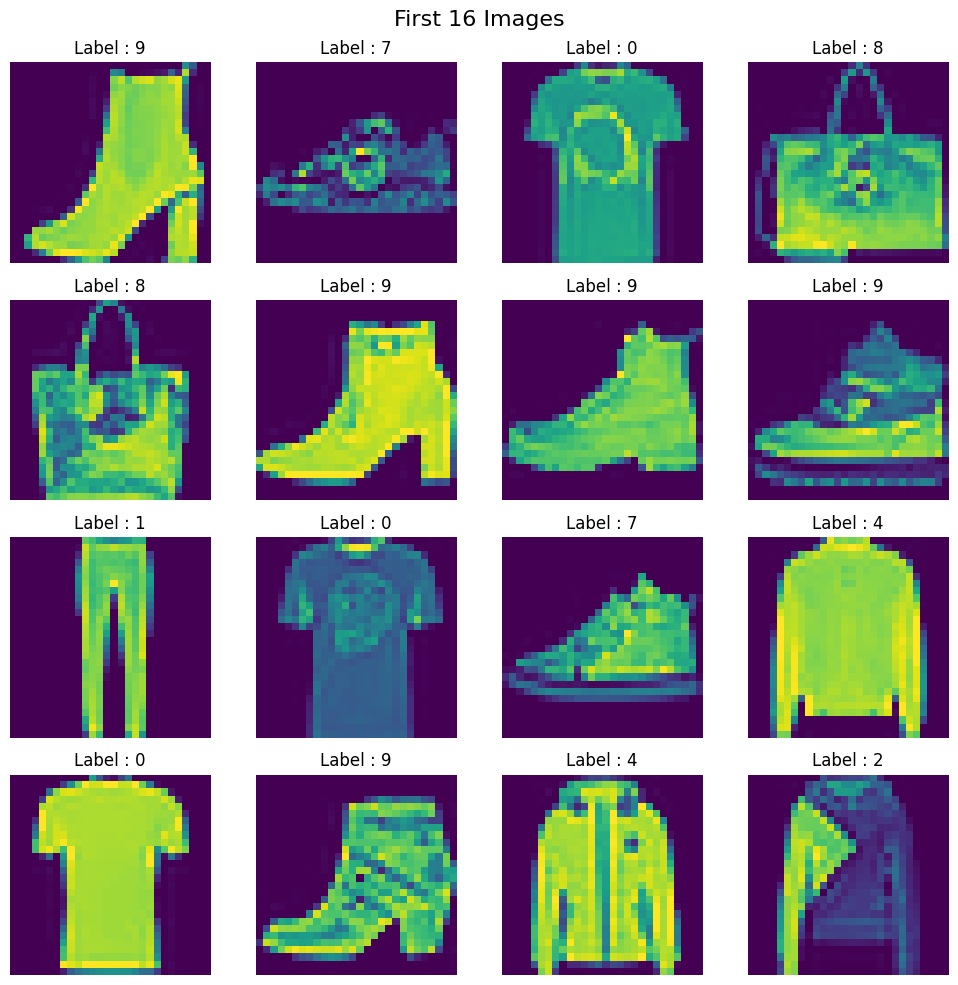

In [12]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 Images",fontsize=16)

for i,ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label : {df.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,1])
plt.show()

In [7]:
axes

array([[<Axes: title={'center': 'Label : 9'}>,
        <Axes: title={'center': 'Label : 7'}>,
        <Axes: title={'center': 'Label : 0'}>,
        <Axes: title={'center': 'Label : 8'}>],
       [<Axes: title={'center': 'Label : 8'}>,
        <Axes: title={'center': 'Label : 9'}>,
        <Axes: title={'center': 'Label : 9'}>,
        <Axes: title={'center': 'Label : 9'}>],
       [<Axes: title={'center': 'Label : 1'}>,
        <Axes: title={'center': 'Label : 0'}>,
        <Axes: title={'center': 'Label : 7'}>,
        <Axes: title={'center': 'Label : 4'}>],
       [<Axes: title={'center': 'Label : 0'}>,
        <Axes: title={'center': 'Label : 9'}>,
        <Axes: title={'center': 'Label : 4'}>,
        <Axes: title={'center': 'Label : 2'}>]], dtype=object)

In [14]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train=X_train/255.0
X_test=X_test/255.0

In [17]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [18]:
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features=torch.tensor(features,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [26]:
train_dataset=CustomDataset(X_train,y_train)

In [37]:
len(train_dataset[0][0])

784

In [29]:
test_dataset=CustomDataset(X_test,y_test)

In [30]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)


In [31]:
class MyNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
        # we are not adding softmax becuase in pytorch softmax is implemented in cross entropy loss by default
    )

  def forward(self,x):
    return self.model(x)

In [32]:
epochs=100
learning_rate=0.1


In [33]:
model=MyNN(X_train.shape[1])

criterion=nn.CrossEntropyLoss()

optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [34]:
len(train_loader)

150

In [39]:
for epoch in range(epochs):
  total_epoch_loss=0

  for batch_feautures,batch_labels in train_loader:
    #forward pass
    outputs=model(batch_feautures)
    #calculate loss
    loss=criterion(outputs,batch_labels)
    # back pass
    # set grad to zero
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()
    total_epoch_loss=total_epoch_loss+loss.item()

  avg_loss=total_epoch_loss/len(train_loader)
  print(f"Epoch : {epoch+1}/{epochs} Loss : {avg_loss:.4f}")

Epoch : 1/100 Loss : 0.0085
Epoch : 2/100 Loss : 0.0037
Epoch : 3/100 Loss : 0.0065
Epoch : 4/100 Loss : 0.0184
Epoch : 5/100 Loss : 0.0161
Epoch : 6/100 Loss : 0.0033
Epoch : 7/100 Loss : 0.0025
Epoch : 8/100 Loss : 0.0022
Epoch : 9/100 Loss : 0.0021
Epoch : 10/100 Loss : 0.0018
Epoch : 11/100 Loss : 0.0016
Epoch : 12/100 Loss : 0.0016
Epoch : 13/100 Loss : 0.0016
Epoch : 14/100 Loss : 0.0014
Epoch : 15/100 Loss : 0.0015
Epoch : 16/100 Loss : 0.0014
Epoch : 17/100 Loss : 0.0013
Epoch : 18/100 Loss : 0.0012
Epoch : 19/100 Loss : 0.0013
Epoch : 20/100 Loss : 0.0012
Epoch : 21/100 Loss : 0.0011
Epoch : 22/100 Loss : 0.0011
Epoch : 23/100 Loss : 0.0011
Epoch : 24/100 Loss : 0.0010
Epoch : 25/100 Loss : 0.0010
Epoch : 26/100 Loss : 0.0010
Epoch : 27/100 Loss : 0.0010
Epoch : 28/100 Loss : 0.0009
Epoch : 29/100 Loss : 0.0009
Epoch : 30/100 Loss : 0.0009
Epoch : 31/100 Loss : 0.0009
Epoch : 32/100 Loss : 0.0009
Epoch : 33/100 Loss : 0.0008
Epoch : 34/100 Loss : 0.0008
Epoch : 35/100 Loss : 0

In [40]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [41]:
total=0
correct=0

with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    outputs=model(batch_features)
    _,predicted=torch.max(outputs,1)
    total=total+batch_labels.shape[0]
    correct=correct+(predicted==batch_labels).sum().item()

print(correct/total)

0.8375
